<a href="https://colab.research.google.com/github/caryjim/2016-08-23-unt-github-collaboration/blob/master/Jim_Self_Study_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Read Grus:  Chapter 9, 23
 

Find all the codes from the textbooks, and input them into a ipynb file, name it <LastName>_selfstudy3.ipynb
  
Complete all the interactive tutorials and practice problems on Regular Expressions.
  
Put your solution of exercise in Lesson 4 "The presidents" to the end of the ipynb file. Upload it to your own github repo.
  
Submit the link of your ipynb file on github to Canvas.


In [0]:
# Chapter 9 Grus Book with Python 2 Notebook

In [0]:
# egrep.py
import sys, re

# sys.argv is the list of command-line arguments
# sys.argv[0] is the name of the program itself
# sys.argv[1] will be the regex specified at the command line
regex = sys.argv[1]

# for every line passed into the script
for line in sys.stdin:
  # if it matches the regex, write it to stdout
  if re.search(regex, line):
    sys.stdout.write(line)

In [0]:
# line_count.py
import sys

count = 0
for line in sys.stdin:
  count += 1
  
# print goes to sys.stdout
print count

0


In [0]:
type SomeFile.txt | python egrep.py "[0-9]" | python line_count.py

SyntaxError: ignored

In [0]:
# most_common_words.py
import sys
from collections import Counter

# pass in number of words as first argument
try:
  num_words = int(sys.argv[1])
except:
  print "usage: most_common_words.py num_words"
  sys.exit(1) # non-zero exit code indicates error
  
counter = Counter(word.lower() # lowercase words
                  for line in sys.stdin #
                  for word in line.strip().split() # split on spaces
                  if word) # skip empty 'words'

for word, count in counter.most_common(num_words):
  sys.stdout.write(str(count))
  sys.stdout.write("\t")
  
sys.stdout.write(word)
sys.stdout.write("\n")

usage: most_common_words.py num_words


SystemExit: ignored

/usr/local/lib/python2.7/dist-packages/IPython/core/interactiveshell.py:2890: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [0]:
C:\DataScience>type the_bible.txt | python most_common_words.py 10

SyntaxError: ignored

In [0]:
# 'r' means read-only
file_for_reading = open('reading_file.txt', 'r')

# 'w' is write -- will destroy the file if it already exists!
file_for_writing = open('writing_file.txt', 'w')

# 'a' is append -- for adding to the end of the file
file_for_appending = open('appending_file.txt', 'a')

# don't forget to close your files when you're done
file_for_writing.close()

IOError: ignored

In [0]:
with open(filename,'r') as f:
  data = function_that_gets_data_from(f)
  
  # at this point f has already been closed, so don't try to use it
process(data)

NameError: ignored

In [0]:
starts_with_hash = 0

with open('input.txt','r') as f:
  for line in f: # look at each line in the file
    if re.match("^#",line): # use a regex to see if it starts with '#'
      starts_with_hash += 1 # if it does, add 1 to the count

IOError: ignored

In [0]:
def get_domain(email_address):
  """split on '@' and return the last piece"""
  return email_address.lower().split("@")[-1]

with open('email_addresses.txt', 'r') as f:
  domain_counts = Counter(get_domain(line.strip())
                          for line in f
                          if "@" in line)

IOError: ignored

In [0]:
import csv

with open('tab_delimited_stock_prices.txt', 'rb') as f:
  reader = csv.reader(f, delimiter='\t')
  for row in reader:
    date = row[0]
    symbol = row[1]
    closing_price = float(row[2])
    process(date, symbol, closing_price)

IOError: ignored

In [0]:
with open('colon_delimited_stock_prices.txt', 'rb') as f:
  reader = csv.DictReader(f, delimiter=':')
  for row in reader:
    date = row["date"]
    symbol = row["symbol"]
    closing_price = float(row["closing_price"])
    process(date, symbol, closing_price)

IOError: ignored

In [0]:
today_prices = { 'AAPL' : 90.91, 'MSFT' : 41.68, 'FB' : 64.5 }

with open('comma_delimited_stock_prices.txt','wb') as f:
  writer = csv.writer(f, delimiter=',')
  for stock, price in today_prices.items():
    writer.writerow([stock, price])

In [0]:
results = [["test1", "success", "Monday"],
           ["test2", "success, kind of", "Tuesday"],
           ["test3", "failure, kind of", "Wednesday"],
           ["test4", "failure, utter", "Thursday"]]

# don't do this!
with open('bad_csv.txt', 'w') as f:
  for row in results:
    f.write(",".join(map(str, row))) # might have too many commas in it!
    f.write("\n") # row might have newlines as well!

In [0]:
!pip install html5lib

In [0]:
from bs4 import BeautifulSoup
import requests
html = requests.get("http://www.example.com").text
soup = BeautifulSoup(html, 'html5lib')

In [0]:
first_paragraph = soup.find('p') # or just soup.p

In [0]:
first_paragraph_text = soup.p.text
first_paragraph_words = soup.p.text.split()

In [0]:
first_paragraph_id = soup.p['id'] # raises KeyError if no 'id'
first_paragraph_id2 = soup.p.get('id') # returns None if no 'id'

KeyError: ignored

In [0]:
all_paragraphs = soup.find_all('p') # or just soup('p')
paragraphs_with_ids = [p for p in soup('p') if p.get('id')]

In [0]:
important_paragraphs = soup('p', {'class' : 'important'})
important_paragraphs2 = soup('p', 'important')
important_paragraphs3 = [p for p in soup('p')
if 'important' in p.get('class', [])]

In [0]:
# warning, will return the same span multiple times
# if it sits inside multiple divs
# be more clever if that's the case

spans_inside_divs = [span
for div in soup('div') # for each <div> on the page
for span in div('span')] # find each <span> inside it

In [0]:
# you don't have to split the url like this unless it needs to fit in a book
url = "http://shop.oreilly.com/category/browse-subjects/" + \
"data.do?sortby=publicationDate&page=1"
soup = BeautifulSoup(requests.get(url).text, 'html5lib')

In [0]:
tds = soup('td', 'thumbtext')
print len(tds)

0


In [0]:
def is_video(td):
"""it's a video if it has exactly one pricelabel, and if
the stripped text inside that pricelabel starts with 'Video'"""
pricelabels = td('span', 'pricelabel')
return (len(pricelabels) == 1 and
pricelabels[0].text.strip().startswith("Video"))

print len([td for td in tds if not is_video(td)])

IndentationError: ignored

In [0]:
title = td.find("div", "thumbheader").a.text

NameError: ignored

In [0]:
author_name = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", author_name).split(",")]

NameError: ignored

In [0]:
isbn_link = td.find("div", "thumbheader").a.get("href")
# re.match captures the part of the regex in parentheses
isbn = re.match("/product/(.*)\.do", isbn_link).group(1)

NameError: ignored

In [0]:
date = td.find("span", "directorydate").text.strip()

NameError: ignored

In [0]:
def book_info(td):
  """given a BeautifulSoup <td> Tag representing a book,
  extract the book's details and return a dict"""
  
title = td.find("div", "thumbheader").a.text
by_author = td.find('div', 'AuthorName').text
authors = [x.strip() for x in re.sub("^By ", "", by_author).split(",")]
isbn_link = td.find("div", "thumbheader").a.get("href")
isbn = re.match("/product/(.*)\.do", isbn_link).groups()[0]
date = td.find("span", "directorydate").text.strip()

return {
"title" : title,
"authors" : authors,
"isbn" : isbn,
"date" : date
}

NameError: ignored

In [0]:
from bs4 import BeautifulSoup
import requests

In [0]:
from time import sleep
base_url = "http://shop.oreilly.com/category/browse-subjects/" + \
           "data.do?sortby=publicationDate&page="

books = []

NUM_PAGES = 31 # at the time of writing, probably more by now

for page_num in range(1, NUM_PAGES + 1):
  print "souping page", page_num, ",", len(books), " found so far"
  url = base_url + str(page_num)
  soup = BeautifulSoup(requests.get(url).text, 'html5lib')
  
for td in soup('td', 'thumbtext'):
  if not is_video(td):
    books.append(book_info(td))
    
# now be a good citizen and respect the robots.txt!
sleep(30)

souping page 1 , 0  found so far
souping page 2 , 0  found so far
souping page 3 , 0  found so far
souping page 4 , 0  found so far
souping page 5 , 0  found so far
souping page 6 , 0  found so far
souping page 7 , 0  found so far
souping page 8 , 0  found so far
souping page 9 , 0  found so far
souping page 10 , 0  found so far
souping page 11 , 0  found so far
souping page 12 , 0  found so far
souping page 13 , 0  found so far
souping page 14 , 0  found so far
souping page 15 , 0  found so far
souping page 16 , 0  found so far
souping page 17 , 0  found so far
souping page 18 , 0  found so far
souping page 19 , 0  found so far
souping page 20 , 0  found so far
souping page 21 , 0  found so far
souping page 22 , 0  found so far
souping page 23 , 0  found so far
souping page 24 , 0  found so far
souping page 25 , 0  found so far
souping page 26 , 0  found so far
souping page 27 , 0  found so far
souping page 28 , 0  found so far
souping page 29 , 0  found so far
souping page 30 , 0  fo

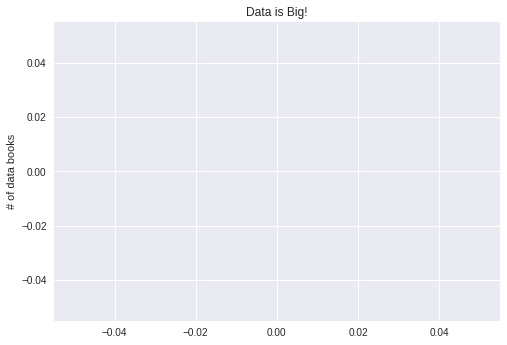

In [0]:
def get_year(book):
  
  """book["date"] looks like 'November 2014' so we need to
  split on the space and then take the second piece"""
  return int(book["date"].split()[1])

# 2014 is the last complete year of data (when I ran this)
year_counts = Counter(get_year(book) for book in books
                      if get_year(book) <= 2014)

import matplotlib.pyplot as plt
years = sorted(year_counts)
book_counts = [year_counts[year] for year in years]
plt.plot(years, book_counts)
plt.ylabel("# of data books")
plt.title("Data is Big!")
plt.show()

In [0]:
#page 114 Json

In [0]:
import json

serialized = """{ "title" : "Data Science Book",
                  "author" : "Joel Grus",
                  "publicationYear" : 2014,
                  "topics" : [ "data", "science", "data science"] }"""

# parse the JSON to create a Python dict
deserialized = json.loads(serialized)
if "data science" in deserialized["topics"]:
  print deserialized

{u'publicationYear': 2014, u'author': u'Joel Grus', u'topics': [u'data', u'science', u'data science'], u'title': u'Data Science Book'}


In [0]:
import requests, json

endpoint = "https://api.github.com/users/joelgrus/repos"

repos = json.loads(requests.get(endpoint).text)

In [0]:
!pip install python-dateutil


In [0]:
from dateutil.parser import parse
dates = [parse(repo["created_at"]) for repo in repos]
month_counts = Counter(date.month for date in dates)
weekday_counts = Counter(date.weekday() for date in dates)

In [0]:
last_5_repositories = sorted(repos,
                             key=lambda r: r["created_at"],
                             reverse=True)[:5]

last_5_languages = [repo["language"]
                    for repo in last_5_repositories]

In [0]:
#Using Twitter API

In [0]:
!pip install twython

from twython import Twython

twitter = Twython(CONSUMER_KEY, CONSUMER_SECRET)

# search for tweets containing the phrase "data science"
for status in twitter.search(q='"data science"')["statuses"]:
  user = status["user"]["screen_name"].encode('utf-8')
  text = status["text"].encode('utf-8')
  print user, ":", text
  print

NameError: ignored

In [0]:
from twython import TwythonStreamer

# appending data to a global variable is pretty poor form
# but it makes the example much simpler
tweets = []

class MyStreamer(TwythonStreamer):
  """our own subclass of TwythonStreamer that specifies
  how to interact with the stream"""
  
def on_success(self, data):
  """what do we do when twitter sends us data?
  here data will be a Python dict representing a tweet"""
  
  # only want to collect English-language tweets
  if data['lang'] == 'en':
    tweets.append(data)
    print "received tweet #", len(tweets)
    
  # stop when we've collected enough
  if len(tweets) >= 1000:
    self.disconnect()
    
def on_error(self, status_code, data):
    print status_code, data
    self.disconnect()

In [0]:
stream = MyStreamer(CONSUMER_KEY, CONSUMER_SECRET,
                    ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# starts consuming public statuses that contain the keyword 'data'
stream.statuses.filter(track='data')

# if instead we wanted to start consuming a sample of *all* public statuses
# stream.statuses.sample()

NameError: ignored

In [0]:
top_hashtags = Counter(hashtag['text'].lower()
                       for tweet in tweets
                       for hashtag in tweet["entities"]["hashtags"])

print top_hashtags.most_common(5)

[]


In [0]:
#Chapter 23 Grus Book Databases and SQL 


In [0]:
users = [[0, "Hero", 0],
         [1, "Dunn", 2],
         [2, "Sue", 3],
         [3, "Chi", 3]]

In [0]:
class Table:
  def __init__(self, columns):
    self.columns = columns
    self.rows = []
    
  def __repr__(self):
    """pretty representation of the table: columns then rows"""
    return str(self.columns) + "\n" + "\n".join(map(str, self.rows))

  def insert(self, row_values):
    if len(row_values) != len(self.columns):
      raise TypeError("wrong number of elements")
      
    row_dict = dict(zip(self.columns, row_values))
    self.rows.append(row_dict)

In [0]:
users = Table(["user_id", "name", "num_friends"])
users.insert([0, "Hero", 0])
users.insert([1, "Dunn", 2])
users.insert([2, "Sue", 3])
users.insert([3, "Chi", 3])
users.insert([4, "Thor", 3])
users.insert([5, "Clive", 2])
users.insert([6, "Hicks", 3])
users.insert([7, "Devin", 2])
users.insert([8, "Kate", 2])
users.insert([9, "Klein", 3])
users.insert([10, "Jen", 1])

In [0]:
print users

['user_id', 'name', 'num_friends']
{'user_id': 0, 'name': 'Hero', 'num_friends': 0}
{'user_id': 1, 'name': 'Dunn', 'num_friends': 2}
{'user_id': 2, 'name': 'Sue', 'num_friends': 3}
{'user_id': 3, 'name': 'Chi', 'num_friends': 3}
{'user_id': 4, 'name': 'Thor', 'num_friends': 3}
{'user_id': 5, 'name': 'Clive', 'num_friends': 2}
{'user_id': 6, 'name': 'Hicks', 'num_friends': 3}
{'user_id': 7, 'name': 'Devin', 'num_friends': 2}
{'user_id': 8, 'name': 'Kate', 'num_friends': 2}
{'user_id': 9, 'name': 'Klein', 'num_friends': 3}
{'user_id': 10, 'name': 'Jen', 'num_friends': 1}


In [0]:
def update(self, updates, predicate):
  for row in self.rows:
    if predicate(row):
      for column, new_value in updates.iteritems():
        row[column] = new_value

In [0]:
users.update({'num_friends' : 3}, # set num_friends = 3
             lambda row: row['user_id'] == 1) # in rows where user_id == 1

AttributeError: ignored

In [0]:
def delete(self, predicate=lambda row: True):
  """delete all rows matching predicate
  or all rows if no predicate supplied"""
  
self.rows = [row for row in self.rows if not(predicate(row))]

NameError: ignored

In [0]:
users.delete(lambda row: row["user_id"] == 1) # deletes rows with user_id == 1
users.delete() # deletes every row

AttributeError: ignored

In [0]:
def select(self, keep_columns=None, additional_columns=None):
  
  if keep_columns is None: # if no columns specified,
    keep_columns = self.columns # return all columns
    
  if additional_columns is None:
    additional_columns = {}
    
  # new table for results
  result_table = Table(keep_columns + additional_columns.keys())
  
  for row in self.rows:
    new_row = [row[column] for column in keep_columns]
    for column_name, calculation in additional_columns.iteritems():
      new_row.append(calculation(row))
    result_table.insert(new_row)
  
  return result_table

In [0]:
def where(self, predicate=lambda row: True):
  """return only the rows that satisfy the supplied predicate"""
  where_table = Table(self.columns)
  where_table.rows = filter(predicate, self.rows)
  return where_table

def limit(self, num_rows):
  """return only the first num_rows rows"""
  limit_table = Table(self.columns)
  limit_table.rows = self.rows[:num_rows]
  return limit_table

In [0]:
# SELECT * FROM users;
users.select()

# SELECT * FROM users LIMIT 2;
users.limit(2)

# SELECT user_id FROM users;
users.select(keep_columns=["user_id"])

# SELECT user_id FROM users WHERE name = 'Dunn';
users.where(lambda row: row["name"] == "Dunn") \
     .select(keep_columns=["user_id"])

# SELECT LENGTH(name) AS name_length FROM users;
def name_length(row): return len(row["name"])

users.select(keep_columns=[],
             additional_columns = { "name_length" : name_length })

AttributeError: ignored

In [0]:
def group_by(self, group_by_columns, aggregates, having=None):
  
  grouped_rows = defaultdict(list)
  
  # populate groups
  for row in self.rows:
    key = tuple(row[column] for column in group_by_columns)
    grouped_rows[key].append(row)
    
  # result table consists of group_by columns and aggregates
  result_table = Table(group_by_columns + aggregates.keys())
  
  for key, rows in grouped_rows.iteritems():
    if having is None or having(rows):
      new_row = list(key)
      for aggregate_name, aggregate_fn in aggregates.iteritems():
        new_row.append(aggregate_fn(rows))
      result_table.insert(new_row)
      
  return result_table

In [0]:
def min_user_id(rows): return min(row["user_id"] for row in rows)

stats_by_length = users \
  .select(additional_columns={"name_length" : name_length}) \
  .group_by(group_by_columns=["name_length"],
            aggregates={ "min_user_id" : min_user_id,
                        "num_users" : len })

AttributeError: ignored

In [0]:
def first_letter_of_name(row):
  return row["name"][0] if row["name"] else ""

def average_num_friends(rows):
  return sum(row["num_friends"] for row in rows) / len(rows)

def enough_friends(rows):
  return average_num_friends(rows) > 1

avg_friends_by_letter = users \
  .select(additional_columns={'first_letter' : first_letter_of_name}) \
  .group_by(group_by_columns=['first_letter'],
aggregates={ "avg_num_friends" : average_num_friends },
            having=enough_friends)

# and the user_id_sum is:

def sum_user_ids(rows): return sum(row["user_id"] for row in rows)

user_id_sum = users \
  .where(lambda row: row["user_id"] > 1) \
  .group_by(group_by_columns=[],
            aggregates={ "user_id_sum" : sum_user_ids })

AttributeError: ignored

In [0]:
def order_by(self, order):
  new_table = self.select() # make a copy
  new_table.rows.sort(key=order)
  return new_table

In [0]:
friendliest_letters = avg_friends_by_letter \
  .order_by(lambda row: -row["avg_num_friends"]) \
  .limit(4)

NameError: ignored

In [0]:
def join(self, other_table, left_join=False):
  
  join_on_columns = [c for c in self.columns # columns in
                     if c in other_table.columns] # both tables
  
  additional_columns = [c for c in other_table.columns # columns only
                        if c not in join_on_columns] # in right table
  
  # all columns from left table + additional_columns from right table
  join_table = Table(self.columns + additional_columns)

  for row in self.rows:
      def is_join(other_row):
          return all(other_row[c] == row[c] for c in join_on_columns)
  
  other_rows = other_table.where(is_join).rows
  
  # each other row that matches this one produces a result row
  for other_row in other_rows:
    join_table.insert([row[c] for c in self.columns] +
                      [other_row[c] for c in additional_columns])
    
  # if no rows match and it's a left join, output with Nones
  if left_join and not other_rows:
    join_table.insert([row[c] for c in self.columns] +
                      [None for c in additional_columns])
    return join_table

In [0]:
sql_users = users \
  .join(user_interests) \
  .where(lambda row: row["interest"] == "SQL") \
  .select(keep_columns=["name"])

AttributeError: ignored

In [0]:
def count_interests(rows):
  """counts how many rows have non-None interests"""
  return len([row for row in rows if row["interest"] is not None])

user_interest_counts = users \
  .join(user_interests, left_join=True) \
  .group_by(group_by_columns=["user_id"],
            aggregates={"num_interests" : count_interests })

AttributeError: ignored

In [0]:
likes_sql_user_ids = user_interests \
  .where(lambda row: row["interest"] == "SQL") \
  .select(keep_columns=['user_id'])

likes_sql_user_ids.group_by(group_by_columns=[],
                            aggregates={ "min_user_id" : min_user_id })

NameError: ignored

In [0]:
user_interests \
  .where(lambda row: row["interest"] == "SQL") \
  .join(users) \
  .select(["name"])

NameError: ignored

In [0]:
user_interests \
  .join(users) \
  .where(lambda row: row["interest"] == "SQL") \
  .select(["name"])

NameError: ignored

In [0]:
#Solution for Exercise in Class during Lesson 4

In [0]:
!pip install html5lib

In [0]:
!pip install beautifulsoup4

In [0]:
import requests

In [0]:
link = requests.get("http://www.cleveland.com/metro/index.ssf/2017/12/case_western_reserve_university_president_barbara_snyders_base_salary_and_bonus_pay_tops_among_private_colleges_in_ohio.html")

In [0]:
link

<Response [200]>

In [0]:
link.content

b'<!doctype html>\n<!--[if lt IE 7]> <html class="no-js lt-ie10 lt-ie9 lt-ie8 lt-ie7" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 7]>    <html class="no-js lt-ie10 lt-ie9 lt-ie8" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 8]>    <html class="no-js lt-ie10 lt-ie9" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n<!--[if IE 9]>    <html class="no-js lt-ie10" lang="en-US" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <![endif]-->\n\n<!--[if gt IE 9]><!--> <html class="no-js" lang="en-US" dir="ltr" prefix="fb: http://www.facebook.com/2008/fbml og: http://ogp.me/ns#"> <!--<![endif]-->\n\n\t<head>\n\t\t\n\t\t\t\n\t\t\n\t\t\n\t\t\t<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />\n\t\t\t<meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1" />\n\t\t

In [0]:
from bs4 import BeautifulSoup

In [0]:
soup = BeautifulSoup(link.content, 'html.parser')

In [0]:
x = soup.find('div', class_='entry-content')

In [0]:
college_list = x.find('ul').text

In [0]:
print(college_list)


Grant Cornwell, College of Wooster (left in 2015): $911,651
Marvin Krislov, Oberlin College (left in 2016):  $829,913
Mark Roosevelt, Antioch College, (left in 2015): $507,672
Laurie Joyner, Wittenberg University (left in 2015): $463,504
Richard Giese, University of Mount Union (left in 2015): $453,800
Sean Decatur,Kenyon College: $451,698
Adam Weinberg, Denison University: $435,322
Daniel Dibiasio, Ohio Northern University: $414,716
Denvy Bowman, Capital University (left in 2016): $388,570
Anne Steele, Muskingum University (left in 2016): $384,233
Kathy Krendl, Otterbein University:  $378,035
Rockwell Jones, Ohio Wesleyan University: $366,625
Robert Helmer, Baldwin Wallace University: $365,616
Robert Huntington, Heidelberg University: $300,005
Lori Varlotta, Hiram College: $293,336
Joseph Bruno, Marietta College (left in 2016): $288,295
W. Richard Merriman Jr., University of Mount Union (started in June 2015): $221,761



In [0]:
import re

In [0]:
name_pattern = r'(?:,|,\s)([A-Z]{1}.*?)(?:\s\(|:|,)'

In [0]:
name_matches = re.findall(name_pattern, college_list)

In [0]:
print(name_matches)

['College of Wooster', 'Oberlin College', 'Antioch College', 'Wittenberg University', 'University of Mount Union', 'Kenyon College', 'Denison University', 'Ohio Northern University', 'Capital University', 'Muskingum University', 'Otterbein University', 'Ohio Wesleyan University', 'Baldwin Wallace University', 'Heidelberg University', 'Hiram College', 'Marietta College', 'University of Mount Union']


In [0]:
salary_pattern = r'(\$\d\d\d,\d\d\d)'

In [0]:
salary_matches = re.findall(salary_pattern, college_list)

In [0]:
print(salary_matches)

['$911,651', '$829,913', '$507,672', '$463,504', '$453,800', '$451,698', '$435,322', '$414,716', '$388,570', '$384,233', '$378,035', '$366,625', '$365,616', '$300,005', '$293,336', '$288,295', '$221,761']


In [0]:
type(salary_matches)

list

In [0]:
salary_list = [float("".join(i[1:].split(","))) for i in salary_matches]

In [0]:
print(salary_list)

[911651.0, 829913.0, 507672.0, 463504.0, 453800.0, 451698.0, 435322.0, 414716.0, 388570.0, 384233.0, 378035.0, 366625.0, 365616.0, 300005.0, 293336.0, 288295.0, 221761.0]


In [0]:
salary_rate = []
hr = 2000

for each in salary_list:
  rate = each / hr
  salary_rate.append(each)
  break

In [0]:
list(zip(name_matches, salary_rate))

[('College of Wooster', 911651.0)]